In [1]:
import pandas as pd
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import Perceptron
from sklearn.preprocessing import PolynomialFeatures

In [2]:
dfcovid = pd.read_excel('data_covid/COVID-19-geographic-disbtribution-worldwide-2020-05-25.xlsx')

In [3]:
dfcovid['total_cases_to_date'] = dfcovid.apply(lambda row: 
              dfcovid[(dfcovid['geoId'] == row.geoId) 
                      & (dfcovid['dateRep'] <= row.dateRep)]['cases'].sum(), axis = 1) 

dfcovid['total_deaths_to_date'] = dfcovid.apply(lambda row: 
              dfcovid[(dfcovid['geoId'] == row.geoId) 
                      & (dfcovid['dateRep'] <= row.dateRep)]['deaths'].sum(), axis = 1) 

In [4]:
dfcovid['month_day'] = dfcovid.apply(lambda row: str(row.month) + '' + str(row.day), axis = 1) 

In [274]:
# dfcovid[(dfcovid['countriesAndTerritories'] == 'Norway') & (dfcovid['month'] == 2)]
# dfcovid_indonesia
# dfcovid[(dfcovid['geoId'] == 'US') & (dfcovid['month'] == 2)]

In [90]:
# dfcovid[(dfcovid['countriesAndTerritories'] == 'Norway') & (dfcovid['month'] == 3) ] # 3596.52553664, 3870.34084828, 4154.20176649
# dfcovid[(dfcovid['countriesAndTerritories'] == 'Italy') & (dfcovid['month'] == 3) ]
# dfcovid[(dfcovid['countriesAndTerritories'] == 'United_Kingdom') & (dfcovid['month'] == 3) ]
# dfcovid[(dfcovid['countriesAndTerritories'] == 'Indonesia') & (dfcovid['month'] == 3) ]
# dfcovid[(dfcovid['countriesAndTerritories'] == 'South_Korea') & (dfcovid['month'] == 3) ]
# dfcovid[(dfcovid['countriesAndTerritories'] == 'China') & (dfcovid['month'] == 3) ]
# dfcovid[(dfcovid['countriesAndTerritories'] == 'Singapore') & (dfcovid['month'] == 3) ]
# dfcovid[(dfcovid['countriesAndTerritories'] == 'Australia') & (dfcovid['month'] == 3) ]
# dfcovid[(dfcovid['countriesAndTerritories'] == 'France') & (dfcovid['month'] == 3) ]

In [25]:
# dfcovid[dfcovid['Countries and territories'] == 'Indonesia'].groupby('Countries and territories').sum()
# dfcovid.groupby('countriesAndTerritories').sum().sort_values('total_cases_to_date', ascending=False).head(10)
# dfcovid.groupby('countriesAndTerritories').sum().sort_values('cases', ascending=False).head(10)

dfcovid[(dfcovid['countriesAndTerritories'] == 'Indonesia') | (dfcovid['countriesAndTerritories'] == 'Norway')].groupby('countriesAndTerritories').sum()

,day,month,year,cases,deaths,popData2018,total_cases_to_date,total_deaths_to_date
countriesAndTerritories,,,,,,,,
Indonesia,1685,265,218159,7418,635,2.890765e+10,104699,9114
Norway,1734,286,232299,7250,169,6.111486e+08,184939,2442


In [5]:
dfcovid_singapore = dfcovid[(dfcovid['countriesAndTerritories'] == 'Singapore') & 
                           (dfcovid['total_cases_to_date'] > 0)].sort_values('dateRep').reset_index()

dfcovid_southkorea = dfcovid[(dfcovid['countriesAndTerritories'] == 'South_Korea') &
                            (dfcovid['total_cases_to_date'] > 0)].sort_values('dateRep').reset_index()

dfcovid_norway = dfcovid[(dfcovid['countriesAndTerritories'] == 'Norway') &
                            (dfcovid['total_cases_to_date'] > 0)].sort_values('dateRep').reset_index()


dfcovid_indonesia = dfcovid[(dfcovid['countriesAndTerritories'] == 'Indonesia') &
                            (dfcovid['total_cases_to_date'] > 0)].sort_values('dateRep').reset_index()


dfcovid_uk = dfcovid[(dfcovid['countriesAndTerritories'] == 'United_Kingdom') &
                            (dfcovid['total_cases_to_date'] > 0)].sort_values('dateRep').reset_index()


dfcovid_us = dfcovid[(dfcovid['countriesAndTerritories'] == 'United_States_of_America') &
                            (dfcovid['total_cases_to_date'] > 0)].sort_values('dateRep').reset_index()

dfcovid_china = dfcovid[(dfcovid['countriesAndTerritories'] == 'China') &
                            (dfcovid['total_cases_to_date'] > 0)].sort_values('dateRep').reset_index()


dfcovid_italy = dfcovid[(dfcovid['countriesAndTerritories'] == 'Italy') &
                            (dfcovid['total_cases_to_date'] > 0)].sort_values('dateRep').reset_index()

dfcovid_germany = dfcovid[(dfcovid['countriesAndTerritories'] == 'Germany') &
                            (dfcovid['total_cases_to_date'] > 0)].sort_values('dateRep').reset_index()


dfcovid_france = dfcovid[(dfcovid['countriesAndTerritories'] == 'France') &
                            (dfcovid['total_cases_to_date'] > 0)].sort_values('dateRep').reset_index()

dfcovid_belgium = dfcovid[(dfcovid['countriesAndTerritories'] == 'Belgium') &
                            (dfcovid['total_cases_to_date'] > 0)].sort_values('dateRep').reset_index()

In [26]:
# dfcovid_norway.sort_values('dateRep', ascending=False).head(10)
dfcovid_indonesia.sort_values('dateRep', ascending=False).head(10)
# dfcovid_uk
# dfcovid_us

,index,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp,total_cases_to_date,total_deaths_to_date,month_day
43,5286,2020-04-21,21,4,2020,185,8,Indonesia,ID,IDN,267663435.0,Asia,6760,590,421
42,5287,2020-04-20,20,4,2020,327,47,Indonesia,ID,IDN,267663435.0,Asia,6575,582,420
41,5288,2020-04-19,19,4,2020,325,15,Indonesia,ID,IDN,267663435.0,Asia,6248,535,419
40,5289,2020-04-18,18,4,2020,407,24,Indonesia,ID,IDN,267663435.0,Asia,5923,520,418
39,5290,2020-04-17,17,4,2020,380,27,Indonesia,ID,IDN,267663435.0,Asia,5516,496,417
38,5291,2020-04-16,16,4,2020,297,10,Indonesia,ID,IDN,267663435.0,Asia,5136,469,416
37,5292,2020-04-15,15,4,2020,282,60,Indonesia,ID,IDN,267663435.0,Asia,4839,459,415
36,5293,2020-04-14,14,4,2020,316,26,Indonesia,ID,IDN,267663435.0,Asia,4557,399,414
35,5294,2020-04-13,13,4,2020,399,46,Indonesia,ID,IDN,267663435.0,Asia,4241,373,413
34,5295,2020-04-12,12,4,2020,330,21,Indonesia,ID,IDN,267663435.0,Asia,3842,327,412


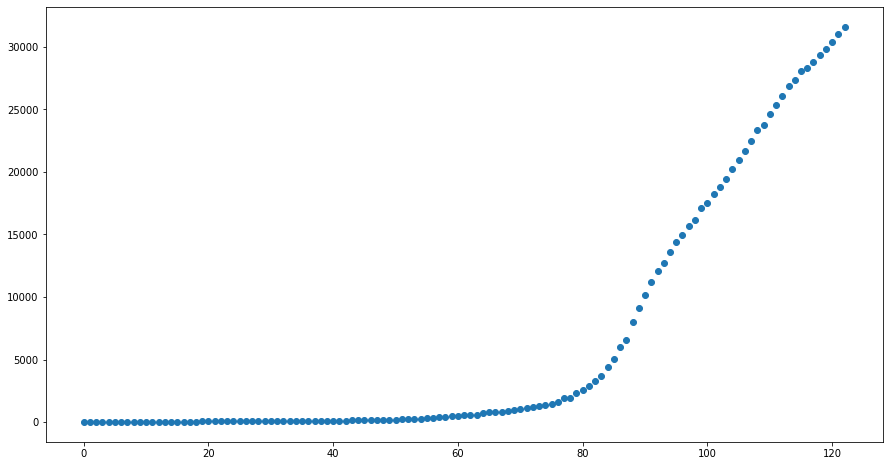

In [6]:
import matplotlib.pyplot as plot

x_singapore = dfcovid_singapore.index

y_singapore = dfcovid_singapore.total_cases_to_date

plot.figure(figsize=(15, 8))

plot.scatter(x_singapore, y_singapore)

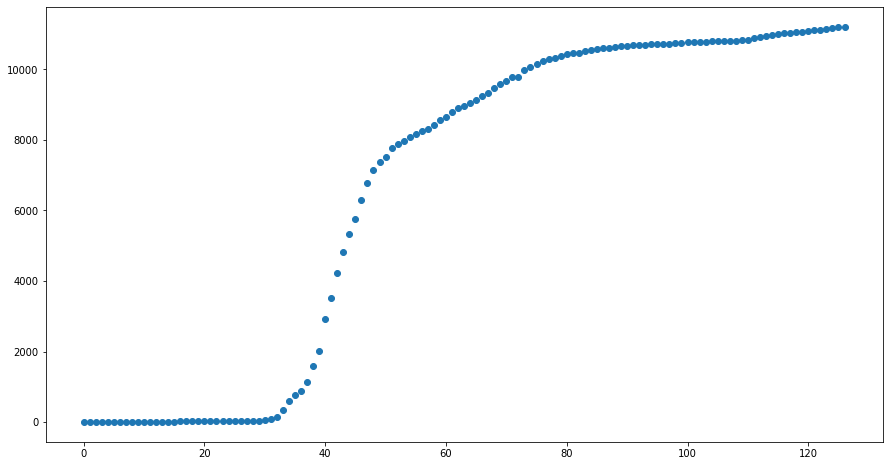

In [7]:
import matplotlib.pyplot as plot

x_southkorea = dfcovid_southkorea.index

y_southkorea = dfcovid_southkorea.total_cases_to_date

plot.figure(figsize=(15, 8))

plot.scatter(x_southkorea, y_southkorea)

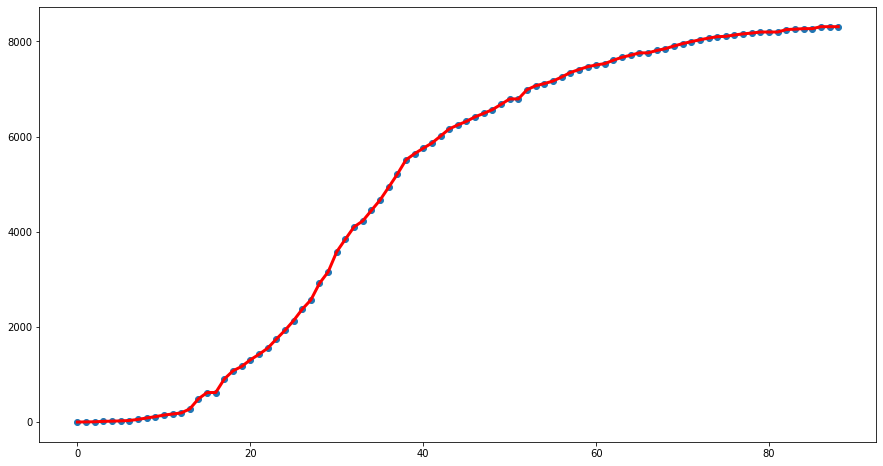

In [8]:
import matplotlib.pyplot as plot

x_norway = dfcovid_norway.index

y_norway = dfcovid_norway.total_cases_to_date

plot.figure(figsize=(15, 8))

plot.scatter(x_norway, y_norway)
plot.plot(x_norway, y_norway, color='red', linewidth=3)

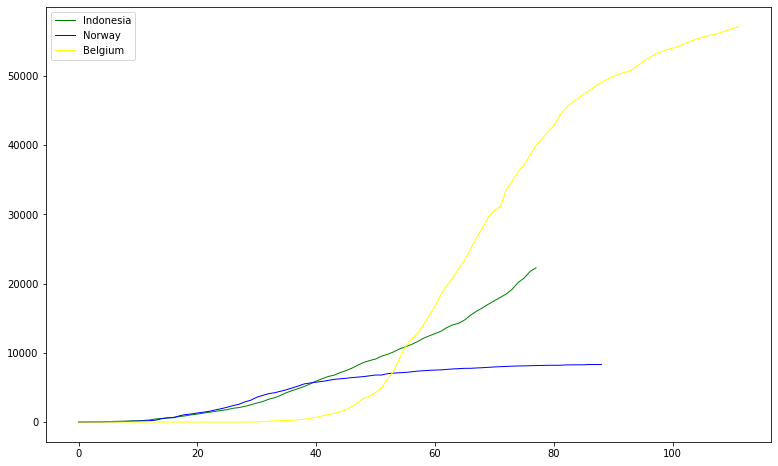

In [9]:
import matplotlib.pyplot as plot

x_indonesia = dfcovid_indonesia.index
y_indonesia = dfcovid_indonesia.total_cases_to_date

x_uk = dfcovid_uk.index
y_uk = dfcovid_uk.total_cases_to_date

x_us = dfcovid_us.index
y_us = dfcovid_us.total_cases_to_date

x_germany = dfcovid_germany.index
y_germany = dfcovid_germany.total_cases_to_date

x_china = dfcovid_china.index
y_china = dfcovid_china.total_cases_to_date

x_france = dfcovid_france.index
y_france = dfcovid_france.total_cases_to_date

x_italy = dfcovid_italy.index
y_italy = dfcovid_italy.total_cases_to_date

x_belgium = dfcovid_belgium.index
y_belgium = dfcovid_belgium.total_cases_to_date

plot.figure(figsize=(13, 8))

# plot.scatter(x_indonesia, y_indonesia, c='r', label='Indonesia')
# plot.scatter(x_norway, y_norway, c='b', label='Norway')
# plot.scatter(x_uk, y_uk, c='y', label='UK')
# plot.scatter(x_us, y_us, c='g', label='US')

plot.plot(x_indonesia, y_indonesia, color='green', linewidth=1, label='Indonesia')
plot.plot(x_norway, y_norway, color='blue', linewidth=1, label='Norway')
plot.plot(x_belgium, y_belgium, color='yellow', linewidth=1, label='Belgium')
# plot.plot(x_uk, y_uk, color='yellow', linewidth=1, label='UK')
# plot.plot(x_us, y_us, color='green', linewidth=1, label='US')
# plot.plot(x_germany, y_germany, color='blue', linewidth=1, label='Germany')
# plot.plot(x_france, y_france, color='red', linewidth=1, label='France')
# plot.plot(x_italy, y_italy, color='black', linewidth=1, label='Italy')
# plot.plot(x_southkorea, y_southkorea, color='brown', linewidth=1, label='South Korea')

plot.legend(loc='upper left')
plot.show()

In [330]:
dfcovid_us.sort_values('total_cases_to_date', ascending=False).head(10)

,index,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,total_cases_to_date,total_deaths_to_date,month_day
82,9972,2020-04-12,12,4,2020,28391,1831,United_States_of_America,US,USA,327167434.0,529951,20608,412
81,9973,2020-04-11,11,4,2020,35527,2087,United_States_of_America,US,USA,327167434.0,501560,18777,411
80,9974,2020-04-10,10,4,2020,33901,1873,United_States_of_America,US,USA,327167434.0,466033,16690,410
79,9975,2020-04-09,9,4,2020,33323,1922,United_States_of_America,US,USA,327167434.0,432132,14817,49
78,9976,2020-04-08,8,4,2020,30613,1906,United_States_of_America,US,USA,327167434.0,398809,12895,48
77,9977,2020-04-07,7,4,2020,30561,1342,United_States_of_America,US,USA,327167434.0,368196,10989,47
76,9978,2020-04-06,6,4,2020,25398,1146,United_States_of_America,US,USA,327167434.0,337635,9647,46
75,9979,2020-04-05,5,4,2020,34272,1344,United_States_of_America,US,USA,327167434.0,312237,8501,45
74,9980,2020-04-04,4,4,2020,32425,1104,United_States_of_America,US,USA,327167434.0,277965,7157,44
73,9981,2020-04-03,3,4,2020,28819,915,United_States_of_America,US,USA,327167434.0,245540,6053,43


In [ ]:
from sklearn.preprocessing import StandardScaler

# y_norway_scaled = StandardScaler().fit_transform(y_norway.to_numpy().reshape(-1, 1) )
y_norway_scaled = np.log1p(y_norway)

plot.scatter(x_norway, y_norway_scaled)

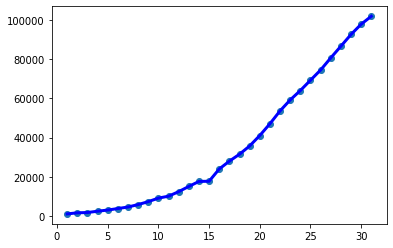

In [120]:
import matplotlib.pyplot as plot

x_italy = dfcovid[(dfcovid['countriesAndTerritories'] == 'Italy') 
            & (dfcovid['month'] == 3)].day

y_italy = dfcovid[(dfcovid['countriesAndTerritories'] == 'Italy') 
            & (dfcovid['month'] == 3)].total_cases_to_date
plot.scatter(x_italy, y_italy)
plot.plot(x_italy, y_italy, color='blue', linewidth=3)

In [15]:
def linear_prediction(country, degree):
    
    df_predict = country

    x_raw = df_predict.index
    y_raw = df_predict.total_cases_to_date
    train_count = len(df_predict)

    # Split the data into training/testing sets
    X_train = x_raw[:train_count].to_numpy().reshape(-1, 1) 
    X_test = x_raw[train_count:].to_numpy().reshape(-1, 1) 

    # Split the targets into training/testing sets
    # y_train = np.log1p(y_raw[-18:]).to_numpy()
    # y_test = np.log1p(y_raw[:-18]).to_numpy()
    y_train = y_raw[:train_count].to_numpy()
    y_test = y_raw[train_count:].to_numpy()
    
    
    for i in range (train_count+1, train_count+20):
        X_test = np.append (X_test, [i]).reshape(-1, 1)
        
    poly = PolynomialFeatures(degree=degree)
    X_train2 = poly.fit_transform(X_train)
    X_test2 = poly.fit_transform(X_test)
    
    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X_train2, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(X_test2)
    
    for j in range (len(x_raw), len(x_raw)+len(y_pred)):
        x_raw = np.append(x_raw, j).reshape(-1, 1)
        
    len(x_raw)
    
    y_raw = np.append(y_raw.to_numpy(), y_pred).reshape(-1, 1)
    
    df_result = pd.DataFrame(data=x_raw, columns=['x'])
    df_result['y'] = y_raw
    df_result.to_csv('data_covid/prediction-'+df_predict['geoId'][0]+'-'+str(degree))
    
#     print(df_result)

In [146]:
# X_train2 = PolynomialFeatures(interaction_only=True).fit_transform(X_train).astype(int)
# X_test2 = PolynomialFeatures(interaction_only=True).fit_transform(X_test).astype(int)
# X_test2

linear_prediction(dfcovid_norway, 1)

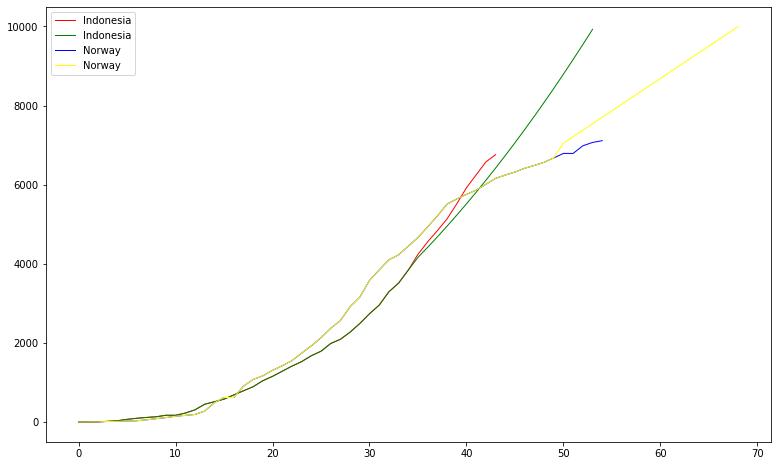

In [16]:
import matplotlib.pyplot as plot

df_predict_id = pd.read_csv('data_covid/prediction-ID-2')
df_predict_no = pd.read_csv('data_covid/prediction-NO-1')
df_predict_us = pd.read_csv('data_covid/prediction-US-2')
df_predict_uk = pd.read_csv('data_covid/prediction-UK-2')
df_predict_it = pd.read_csv('data_covid/prediction-IT-2')
df_predict_de = pd.read_csv('data_covid/prediction-DE-2')

x_indonesia = dfcovid_indonesia.index
y_indonesia = dfcovid_indonesia.total_cases_to_date
x_indonesia_pred = df_predict_id.x
y_indonesia_pred = df_predict_id.y

x_norway = dfcovid_norway.index
y_norway = dfcovid_norway.total_cases_to_date
x_norway_pred = df_predict_no.x
y_norway_pred = df_predict_no.y

# x_uk = dfcovid_uk.index
# y_uk = dfcovid_uk.total_cases_to_date

# x_us = dfcovid_us.index
# y_us = dfcovid_us.total_cases_to_date

# x_germany = dfcovid_germany.index
# y_germany = dfcovid_germany.total_cases_to_date

# x_china = dfcovid_china.index
# y_china = dfcovid_china.total_cases_to_date

# x_france = dfcovid_france.index
# y_france = dfcovid_france.total_cases_to_date

# x_italy = dfcovid_italy.index
# y_italy = dfcovid_italy.total_cases_to_date

# x_belgium = dfcovid_belgium.index
# y_belgium = dfcovid_belgium.total_cases_to_date

plot.figure(figsize=(13, 8))

# plot.scatter(x_indonesia, y_indonesia, c='r', label='Indonesia')
# plot.scatter(x_norway, y_norway, c='b', label='Norway')
# plot.scatter(x_uk, y_uk, c='y', label='UK')
# plot.scatter(x_us, y_us, c='g', label='US')

plot.plot(x_indonesia, y_indonesia, color='red', linewidth=1, label='Indonesia')
plot.plot(x_indonesia_pred, y_indonesia_pred, color='green', linewidth=1, label='Indonesia')

plot.plot(x_norway, y_norway, color='blue', linewidth=1, label='Norway')
plot.plot(x_norway_pred, y_norway_pred, color='yellow', linewidth=1, label='Norway')

# plot.plot(x_belgium, y_belgium, color='yellow', linewidth=1, label='Belgium')
# plot.plot(x_uk, y_uk, color='yellow', linewidth=1, label='UK')
# plot.plot(x_us, y_us, color='green', linewidth=1, label='US')
# plot.plot(x_germany, y_germany, color='blue', linewidth=1, label='Germany')
# plot.plot(x_france, y_france, color='red', linewidth=1, label='France')
# plot.plot(x_italy, y_italy, color='black', linewidth=1, label='Italy')
# plot.plot(x_southkorea, y_southkorea, color='brown', linewidth=1, label='South Korea')

plot.legend(loc='upper left')
plot.show()

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train2, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test2)

y_pred

In [352]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train2, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test2)

y_pred

array([4418.16777404, 4681.14839469, 4951.77012781, 5230.03297339,
       5515.93693143, 5809.48200194, 6110.66818492, 6419.49548035,
       6735.96388826, 7060.07340863, 7391.82404146, 7731.21578676,
       8078.24864452, 8432.92261475, 8795.23769744, 9165.19389259,
       9542.79120021, 9928.0296203 ])

In [387]:
# x_indonesia = np.append(x_indonesia.values, y_pred).reshape(-1, 1)

# y_indonesia = np.append(y_indonesia.to_numpy(), y_pred).reshape(-1, 1)

for j in range (len(x_indonesia), len(x_indonesia)+len(y_pred)):
    x_indonesia = np.append(x_indonesia, j).reshape(-1, 1)

In [1]:
# type(y_indonesia)
# y_indonesia
# y_pred

In [355]:
y_test
# len(y_indonesia)+len(y_pred)

array([], dtype=int64)

In [125]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train2, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test2)

y_pred

array([2601.72035573, 2835.35324111, 3079.03173305, 3332.75583156,
       3596.52553664, 3870.34084828, 4154.20176649])

In [ ]:
# X_train
# x_norway[:-14]
y_test
# np.expm1(y_test)

In [ ]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
plot.scatter(X_test, y_test,  color='black')
plot.plot(X_test, y_pred, color='blue', linewidth=3)

plot.xticks(())
plot.yticks(())

plot.show()

In [ ]:
dfcovid[(dfcovid['Countries and territories'] == 'Norway') 
            & (dfcovid['Month'] == 3)]

In [ ]:
y_italy